# 1. Data prepping

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import math

In [3]:
orig_dataframe = pd.read_csv("marketing_campaign.csv")

# delete broken data
orig_dataframe = orig_dataframe.dropna(how='any',axis=0)
raw_dataframe = orig_dataframe

# dropping columns
orig_dataframe = orig_dataframe.drop("ID", axis=1)
orig_dataframe = orig_dataframe[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]]

dataframe = orig_dataframe.copy(deep=True)

# dataframe - replaced discrete values and selected columns
# orig_dataframe - selected columns
# raw_dataframe - raw as fuck

In [4]:
# # replace categorical data with discrete whole numbers
# categorical_column_keys = ["Education", "Marital_Status"]
# categorical_unique_values = {}

# for i in categorical_column_keys:
#     unique = dataframe[i].unique()
#     categorical_unique_values[i] = unique
#     dataframe[i].replace(unique, np.arange(0, len(dataframe[i].unique()), 1, dtype=int), inplace=True)

In [5]:
orig_dataframe

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2234,709,43,182,42,118,247
2235,406,0,30,0,0,8
2236,908,48,217,32,12,24
2237,428,30,214,80,30,61


In [6]:
# engineer features

In [ ]:
dataframe

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2234,709,43,182,42,118,247
2235,406,0,30,0,0,8
2236,908,48,217,32,12,24
2237,428,30,214,80,30,61


In [8]:
# craft input and output data
X = dataframe.values
X_orig = orig_dataframe.values
X_raw = raw_dataframe.values

In [9]:
# tensorflow conversion
# tf.convert_to_tensor(X)
# tf.convert_to_tensor(y)

In [10]:
# test these individually in the codeblock below

# data testing
# dataframe
# dataframe.dtypes
# dataframe.keys()
# X
# X.shape

# # data validation
# dataframe.isnull().any()

In [11]:
dataframe.keys()

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [12]:
# normalize features
normalization_layer = tf.keras.layers.Normalization(axis=-1)
normalization_layer.adapt(X)
X_normalized = normalization_layer(X).numpy()

## 1.1. Visualization

In [13]:
import matplotlib.pyplot as plt

[Text(0.5, 0, 'x_1 - education status'), Text(0, 0.5, 'y - income')]

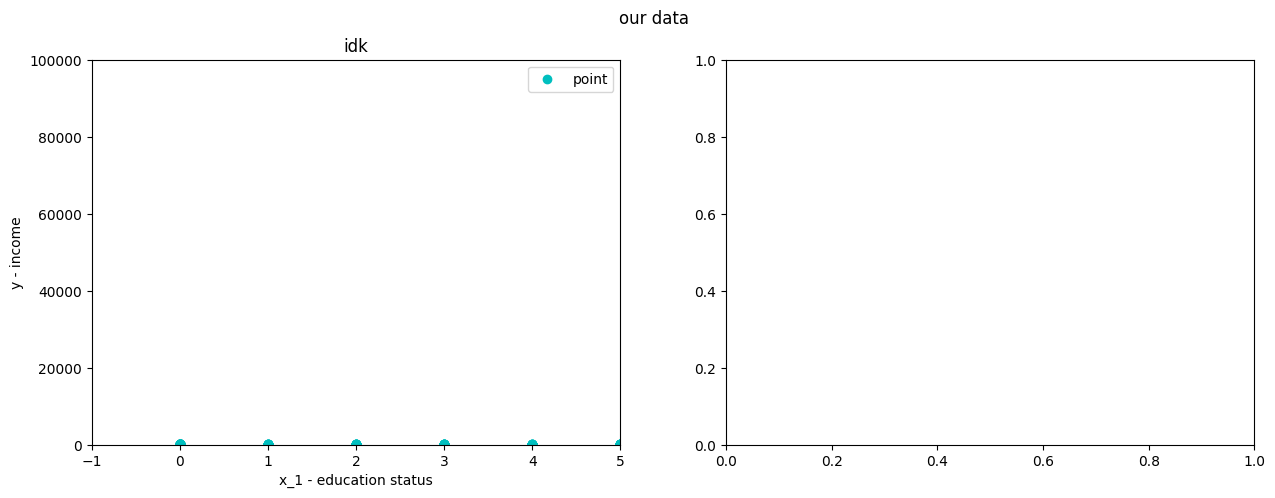

In [14]:
fig, axs = plt.subplots(1, 2)
fig.suptitle(f'our data')
fig.set_figwidth(15)
fig.set_figheight(5)

axs[0].set_title("idk")
# customize this line!
points = axs[0].scatter(X[:,1], X[:,3], c="c")
points.set_label('point')
axs[0].axis((-1, 5, 0, 100000))
axs[0].legend()
axs[0].set(xlabel='x_1 - education status', ylabel='y - income')


# 2. Train (clustering)

## choosing the number of centroids

In [15]:
import sklearn as sk
from sklearn.cluster import KMeans
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

models = []
inertias = []

CENTROIDS_RANGE = range(1, 15)
for i in CENTROIDS_RANGE:
    # number of centroids
    K = i

    model = KMeans(n_clusters=K, random_state=None) # random_state=0 if you want to reproduce anything
    model.fit(X_normalized)
    models.append(model)
    inertias.append(model.inertia_)

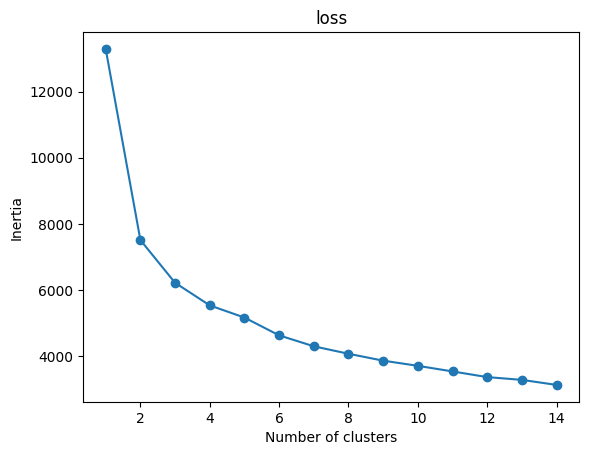

In [16]:
plt.plot(CENTROIDS_RANGE, inertias, marker='o')
plt.title('loss')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

## traning many random instances of K-means to minimize cost

In [17]:
K = 4
new_models = []
new_inertias = []
reps = 100
for i in range(reps):
    model = KMeans(n_clusters=K, random_state=None)
    model.fit(X_normalized)
    new_models.append(model)
    new_inertias.append(model.inertia_)
model = new_models[np.argmin(new_inertias)]

## checking values

In [18]:
model.labels_ == 3

array([False, False,  True, ...,  True,  True, False])

In [19]:
len(X[model.labels_ == 3])

387

In [20]:
model.labels_

array([1, 0, 3, ..., 3, 3, 0])

In [21]:
len(model.cluster_centers_)

4

In [22]:
model.inertia_

5532.37744140625

## plotting

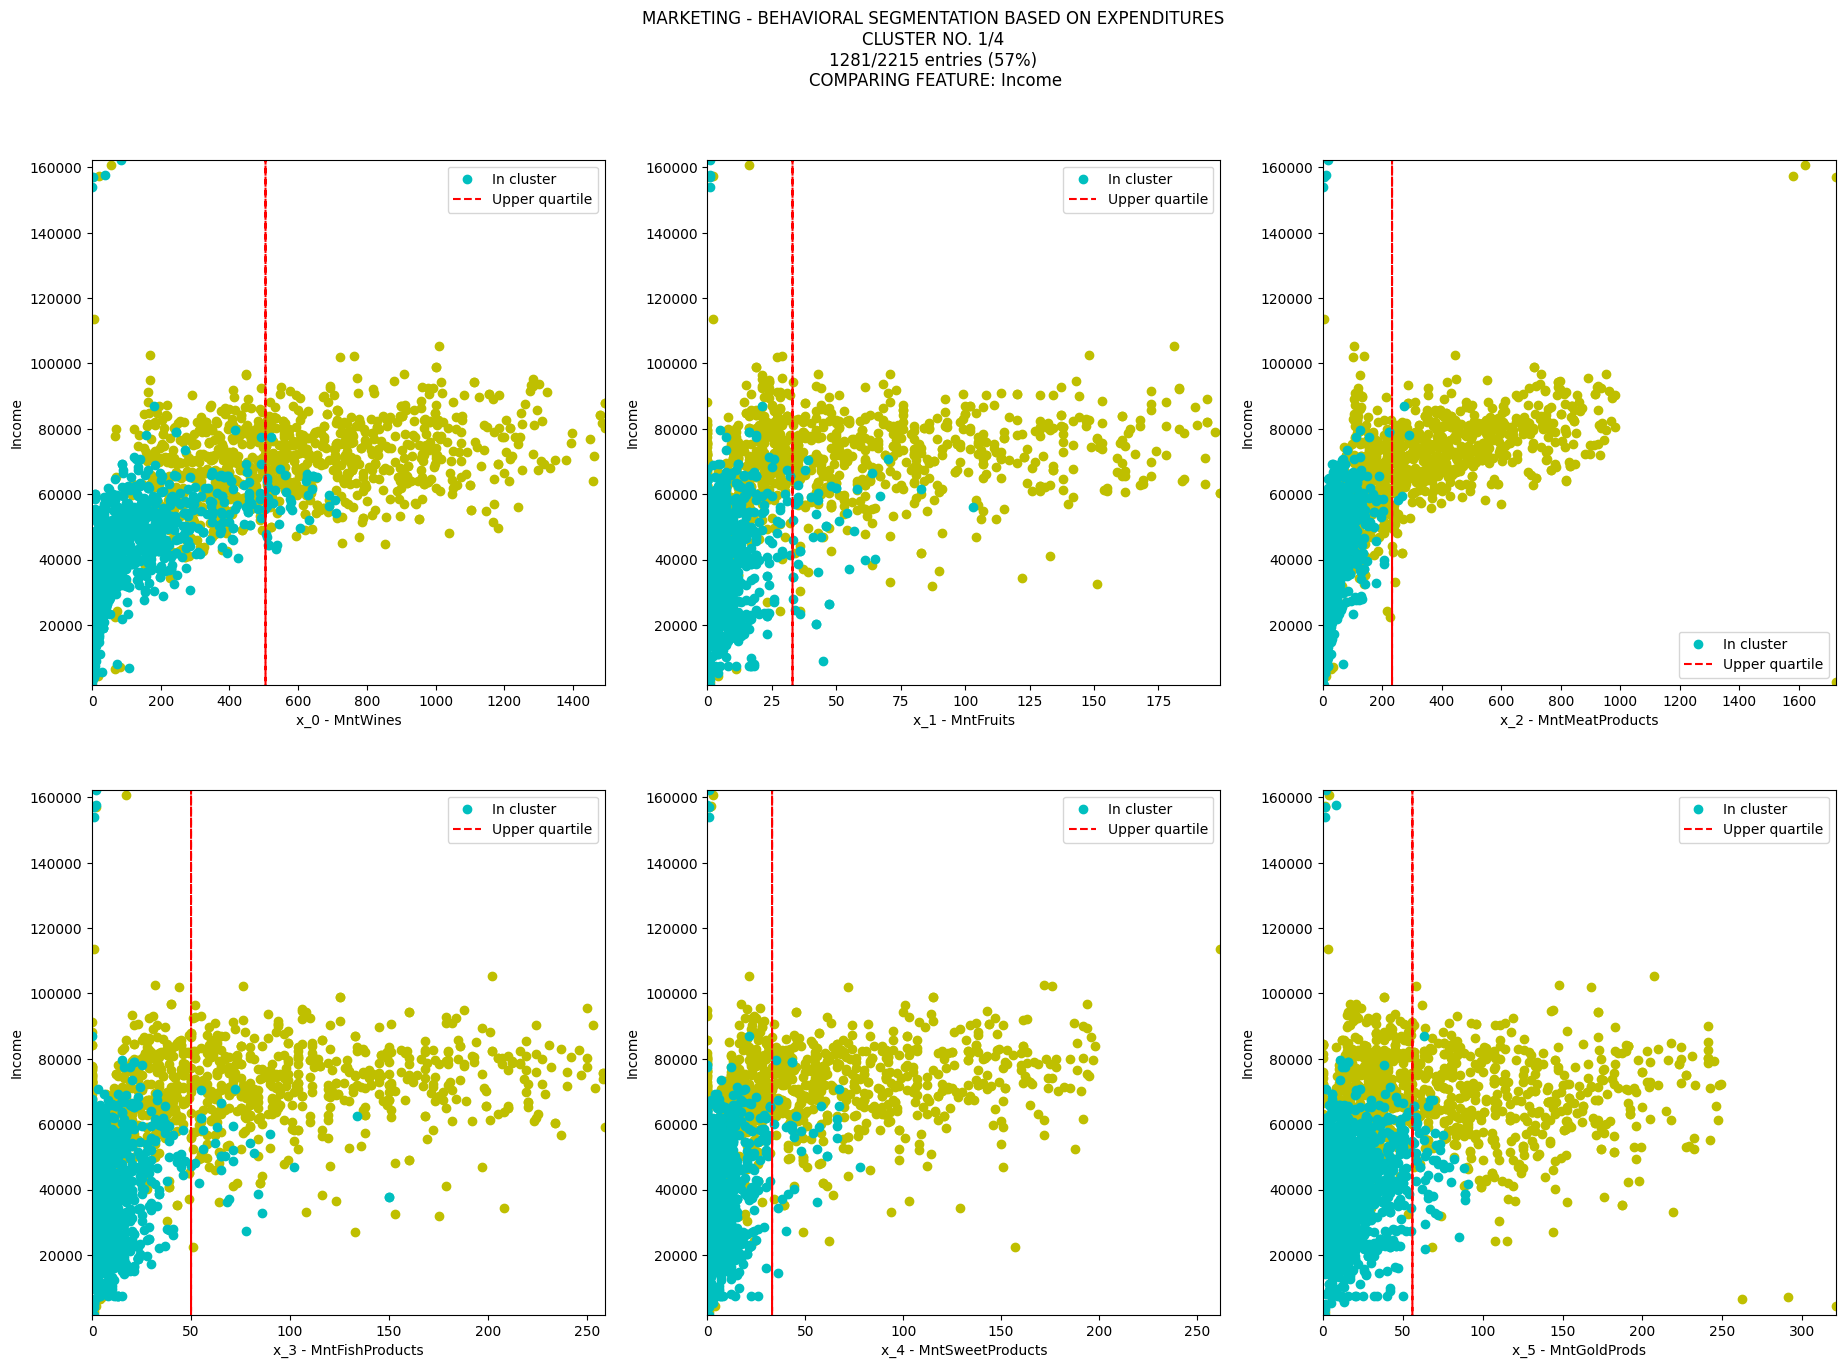

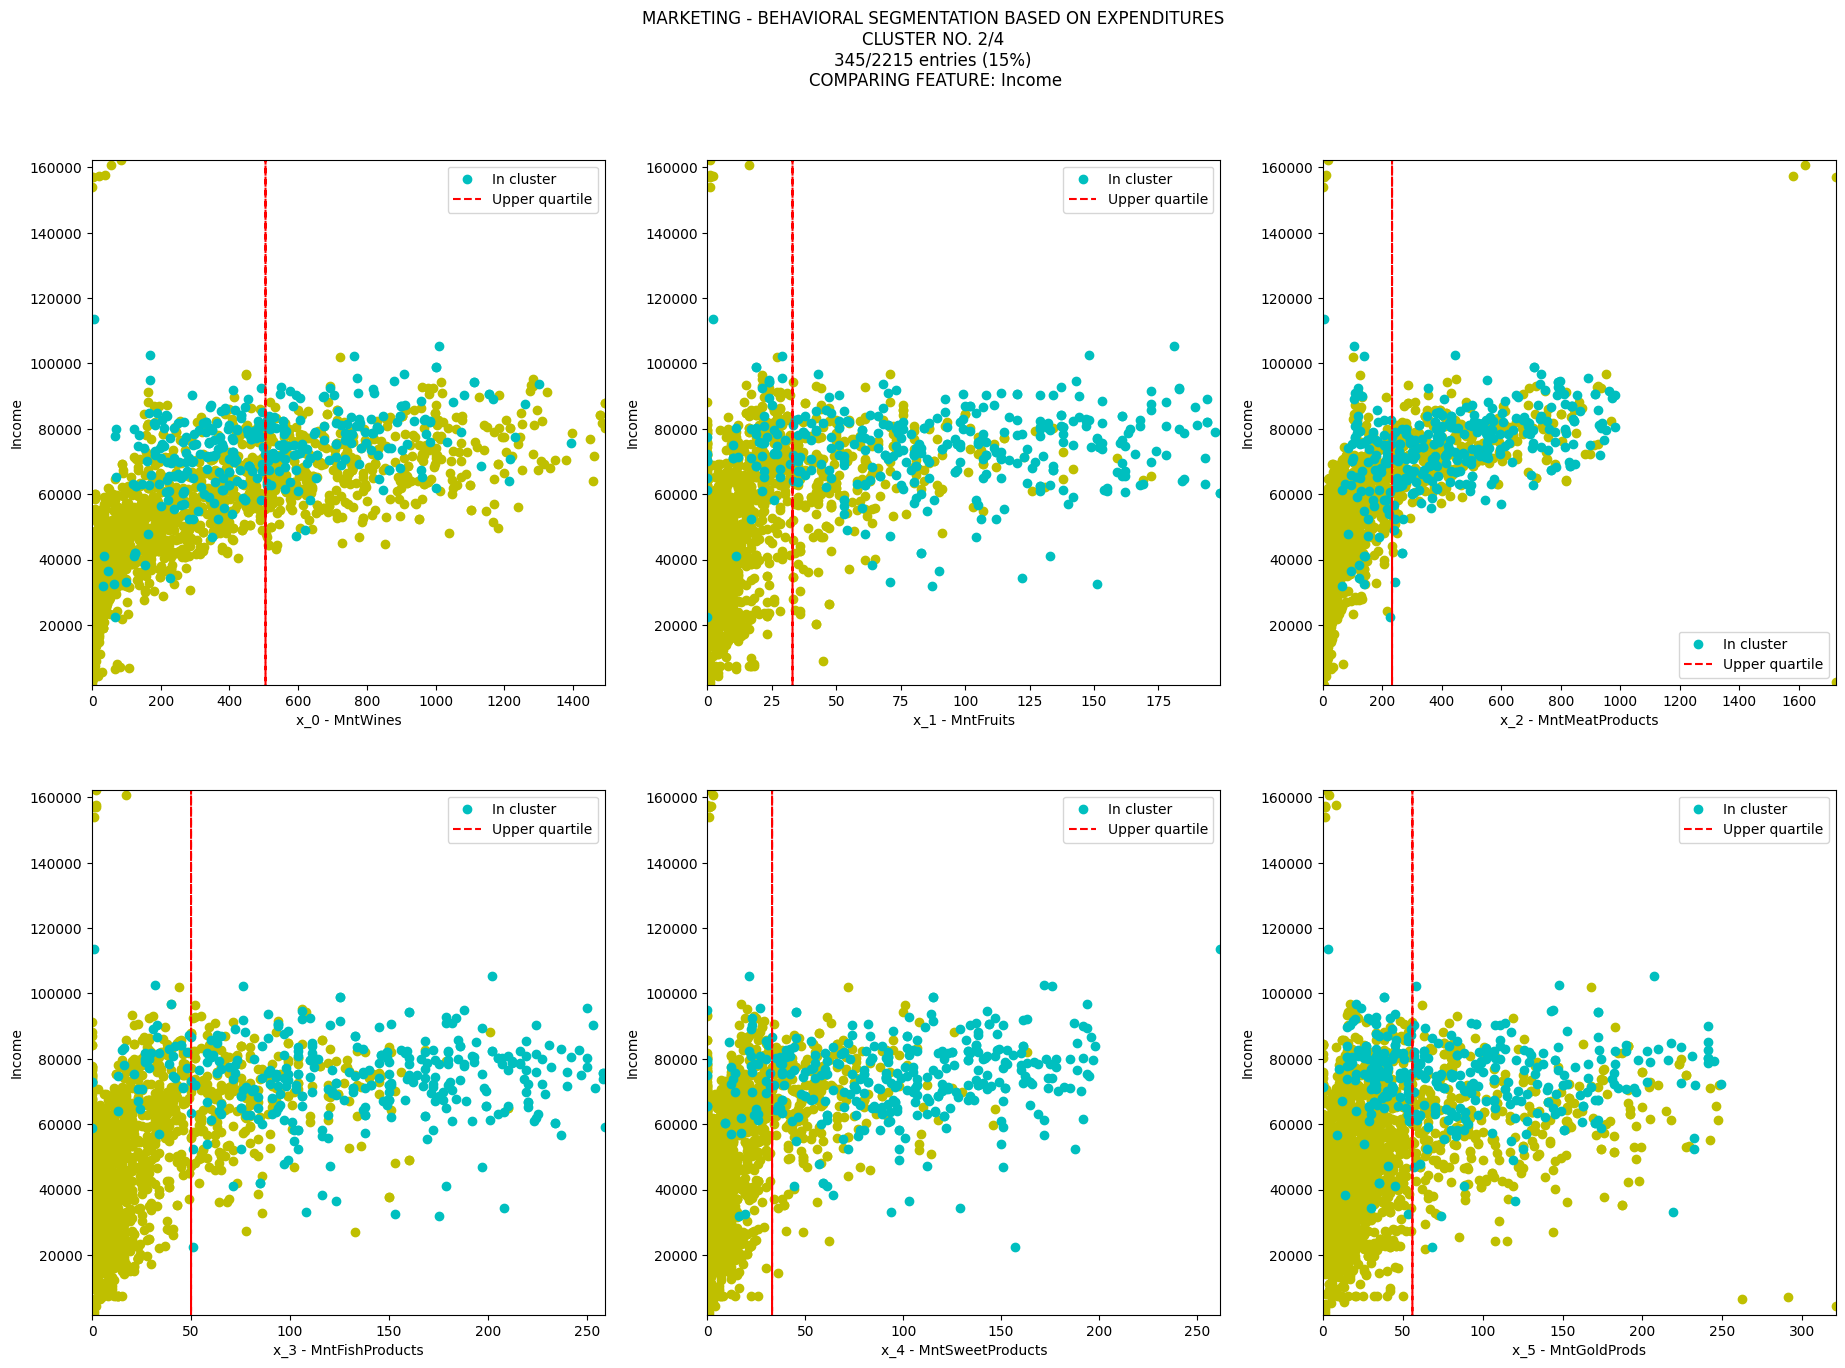

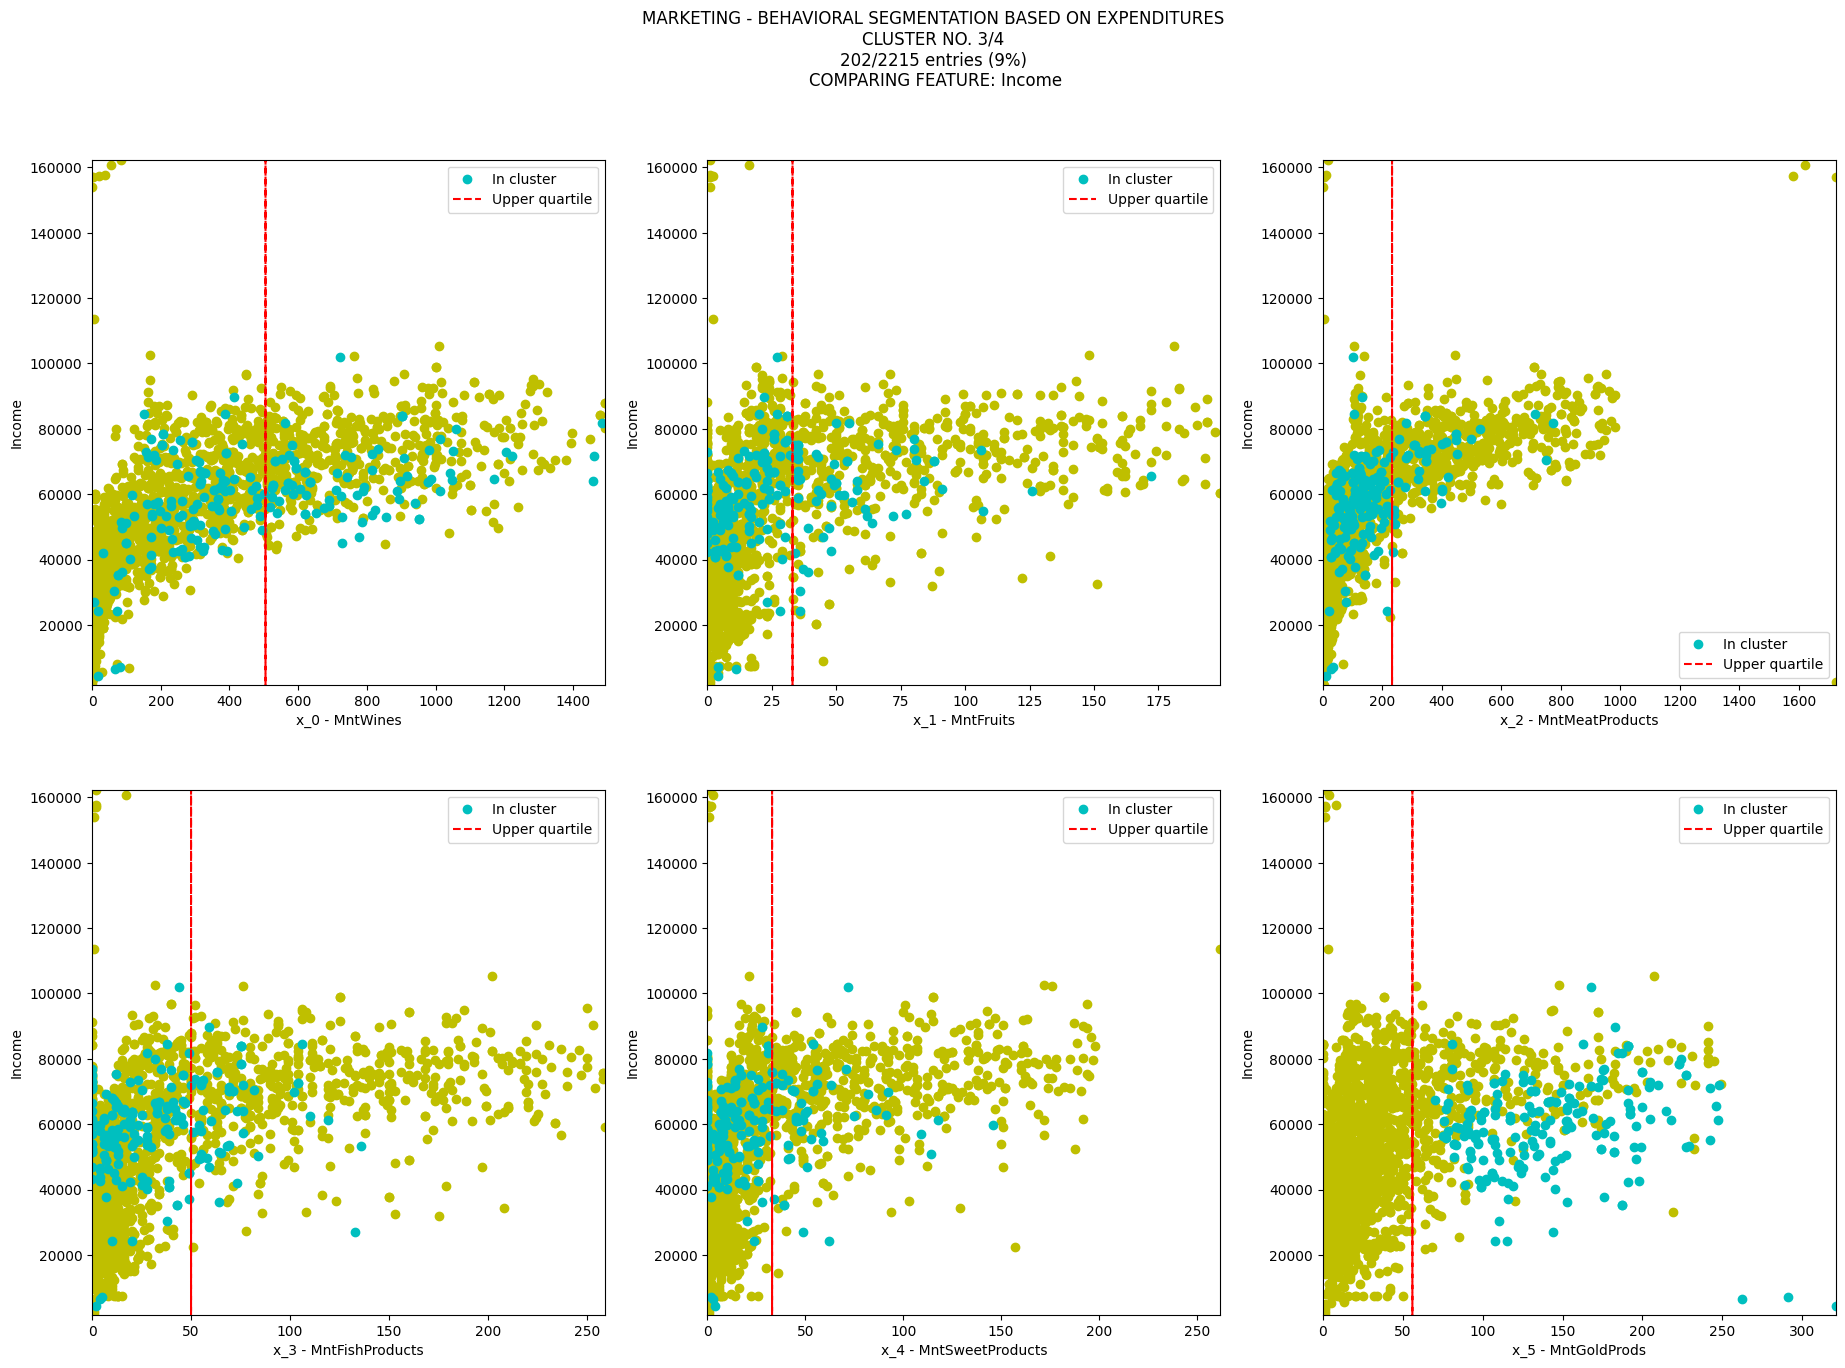

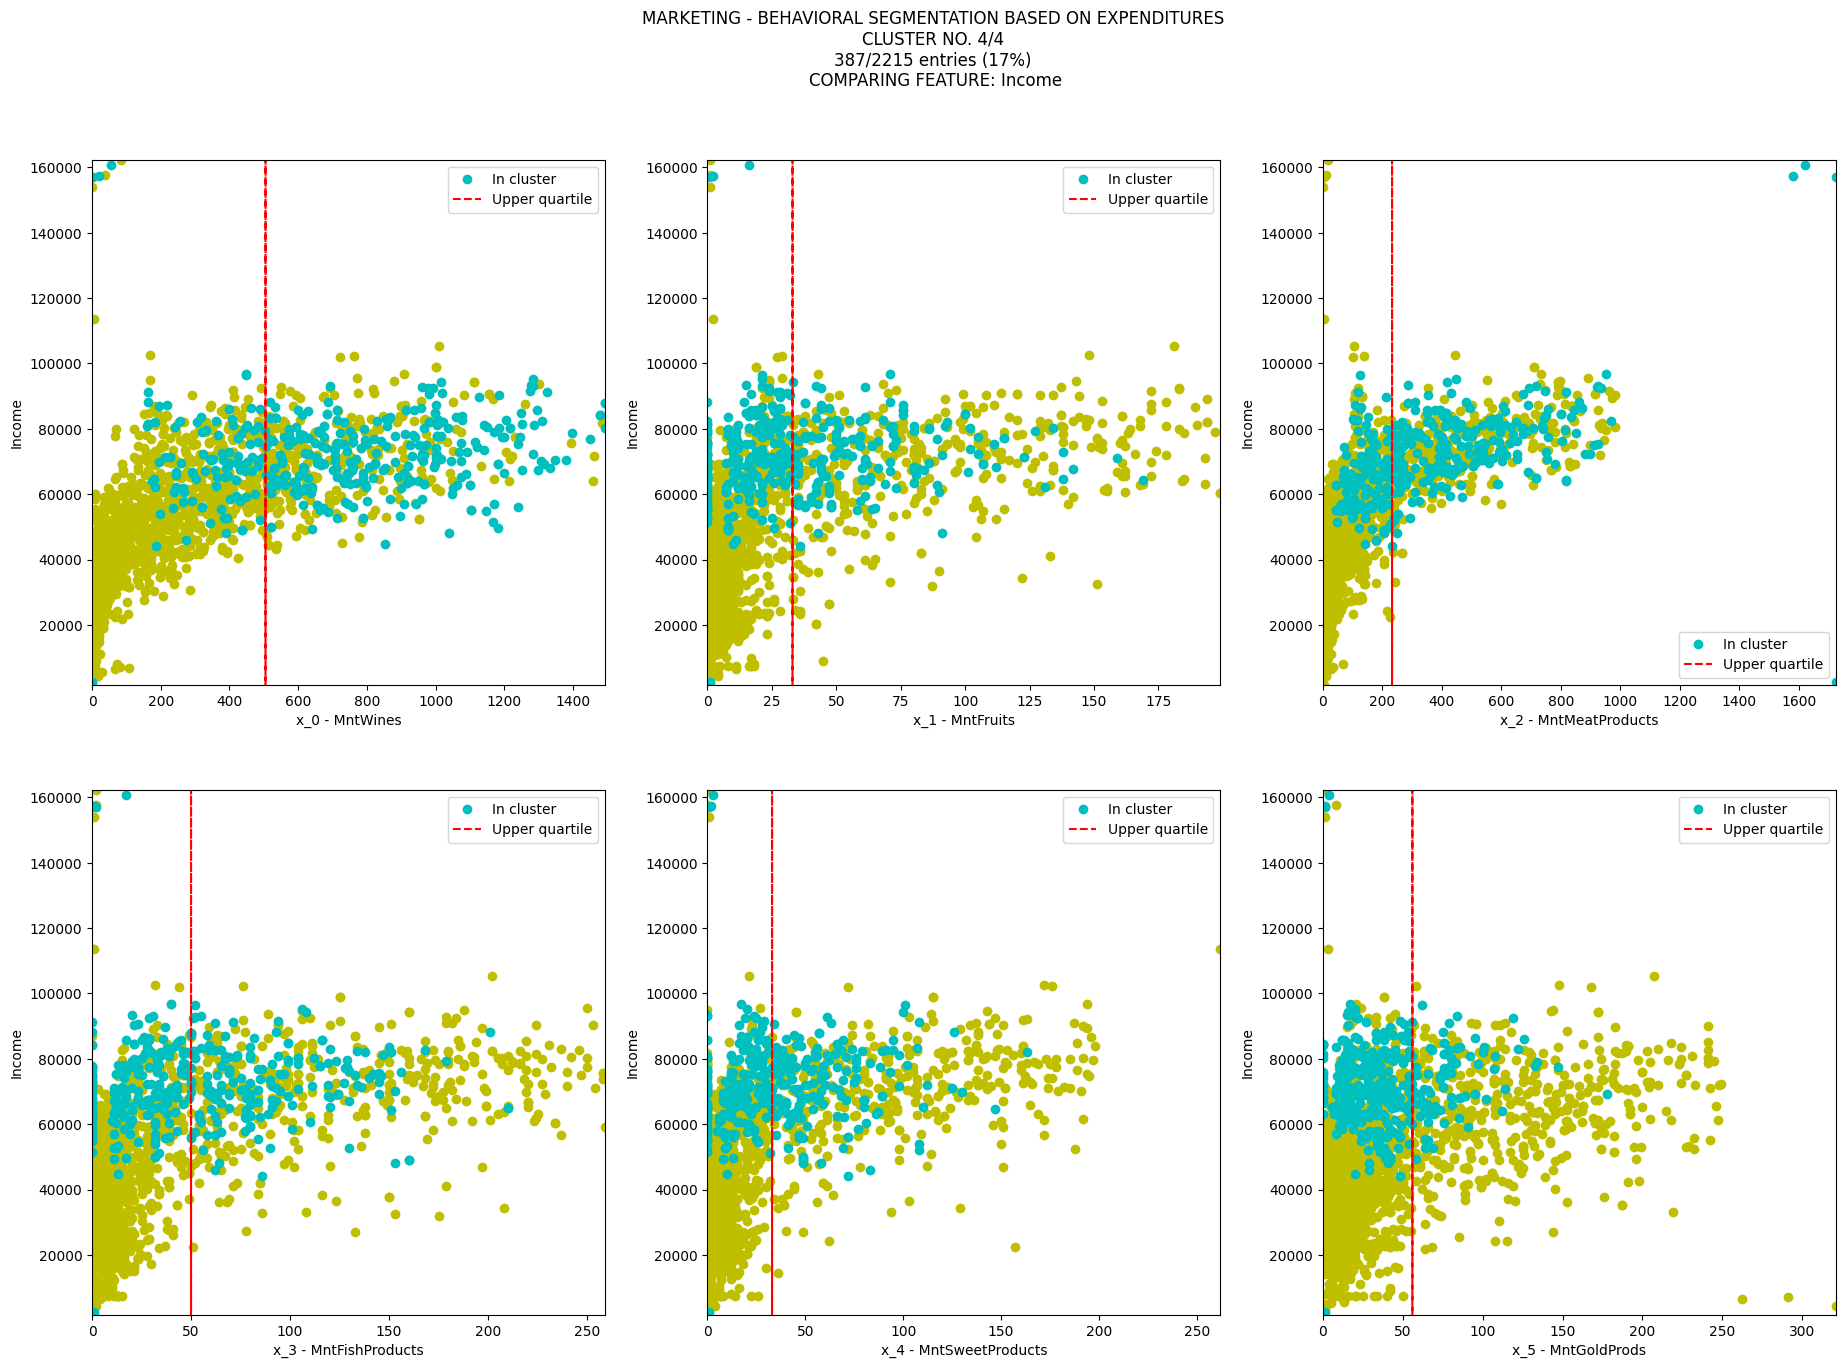

In [25]:
keys = dataframe.keys()
raw_keys = raw_dataframe.keys()
keycount = len(keys)
clustercount = len(model.cluster_centers_)
totalentries = len(X)

# plot
COLSDISPLAY = 3
p2index_raw = 4

for clusterindex in range(clustercount):
    entries_in_cluster = len(X[model.labels_ == clusterindex])

    fig, axs = plt.subplots(math.ceil(keycount/COLSDISPLAY), COLSDISPLAY)
    axssize = axs.shape
    fig.suptitle(f'MARKETING - BEHAVIORAL SEGMENTATION BASED ON EXPENDITURES \nCLUSTER NO. {clusterindex+1}/{clustercount} \n{entries_in_cluster}/{totalentries} entries ({math.floor(entries_in_cluster/totalentries*100)}%) \nCOMPARING FEATURE: {raw_keys[p2index_raw]}')
    fig.set_figwidth(axssize[1]*7.5)
    fig.set_figheight(axssize[0]*7.5)

    for i in range(keycount):
        p1index = i
        

        # if p1index == p2index:
        #     continue

        row = i%axssize[1]
        col = i//axssize[1]
        current_axs = axs[col][row]

        x_axis_orig = X_orig[model.labels_ == clusterindex][:,p1index]
        y_axis_raw = X_raw[model.labels_ == clusterindex][:,p2index_raw]
        x_axis_orig_not = X_orig[model.labels_ != clusterindex][:,p1index]
        y_axis_raw_not = X_raw[model.labels_ != clusterindex][:,p2index_raw]

        x_axis_all = X[:,p1index]
        y_axis_all = X_raw[:,p2index_raw]

        points1 = current_axs.scatter(x_axis_orig_not, y_axis_raw_not, c="y")
        points2 = current_axs.scatter(x_axis_orig, y_axis_raw, c="c")
        points2.set_label('In cluster')

        # X_50percentile = [np.quantile(x_axis_all, .50)] * len(x_axis_all)
        X_75percentile = [np.quantile(x_axis_all, .75)] * len(x_axis_all)
        # current_axs.plot(X_50percentile, y_axis_all, label='50th percentile', linestyle='--', c="r")
        current_axs.plot(X_75percentile, y_axis_all, label='Upper quartile', linestyle='--', c="r")

        current_axs.legend()

        current_axs.axis((np.min(X[:,p1index]), np.max(X[:,p1index]), np.min(X_raw[:,p2index_raw]), np.max(X_raw[:,p2index_raw])))
        current_axs.set(xlabel=f'x_{p1index} - {keys[p1index]}', ylabel=f'{raw_keys[p2index_raw]}')